In [1]:
import pandas as pd
import numpy as np

#模型
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

#模型评估
from sklearn.metrics import mean_squared_error

#可视化
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("AmesHouse_FE_train.csv")
print("train : " + str(train.shape))

test = pd.read_csv("AmesHouse_FE_test.csv")
print("test : " + str(test.shape))

train : (1456, 280)
test : (1459, 280)


In [3]:
y_train = train["SalePrice"]
X_train = train.drop(['SalePrice'], axis = 1)

test_Id = test['Id']
X_test = test.drop(['Id'], axis = 1)

In [4]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化对目标值的标准化器
# 对y标准化不是必须，但对其进行标准化可以使得不同问题w的取值范围相对相同

#自己实现试试...,这些参数需要保留，对测试集预测完后还需要对其进行反变换
mean_y = y_train.mean()
std_y = y_train.std()
y_train = (y_train - mean_y)/std_y

#ss_y = StandardScaler()
#y_train = ss_y.fit_transform(y_train.values.reshape(-1, 1))
#y_test = ss_y.transform(y_test.reshape(-1, 1))

In [13]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
count,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,1.456000e+03,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.0
mean,4.614166e-14,-3.271926e-14,2.301055e-13,9.260926e-14,-9.269382e-13,6.070262e-14,-7.155734e-14,5.450036e-14,7.301582e-13,2.256631e-13,...,0.029533,0.002747,0.001374,0.006181,0.003434,0.003434,0.082418,0.002060,0.868819,0.0
std,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,1.000344e+00,...,0.169353,0.052360,0.037050,0.078405,0.058520,0.058520,0.275094,0.045361,0.337715,0.0
min,-1.691837e+00,-9.281155e-01,-1.554563e+01,-2.433785e-01,-4.486961e+00,-3.814446e+01,-7.007295e+00,-3.716479e+00,-4.109470e+00,-3.285242e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-4.516607e-01,-2.952139e-01,6.432675e-02,-2.433785e-01,-1.028509e+00,2.621613e-02,2.260418e-01,-7.950627e-01,-5.174614e-01,-5.692198e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
50%,1.684272e-01,-9.944678e-02,6.432675e-02,-2.433785e-01,7.007165e-01,2.621613e-02,2.260418e-01,-6.470858e-02,-5.174614e-01,2.698005e-02,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,6.408751e-01,1.155699e-01,6.432675e-02,-2.433785e-01,7.007165e-01,2.621613e-02,2.260418e-01,6.656456e-01,3.805408e-01,9.544021e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,7.550426e+00,2.077593e+01,6.432675e-02,5.125698e+00,7.007165e-01,2.621613e-02,2.260418e-01,2.856708e+00,3.074547e+00,1.285624e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [5]:
# Linear Regression
# 1. 生成学习器实例
lr = LinearRegression()

#2. 在训练集上训练学习器
lr.fit(X_train, y_train)

#3.训练上测试，得到训练误差，实际任务中这一步不需要
# Look at predictions on training and validation set
y_train_pred = lr.predict(X_train)
#y_test_pred = lr.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
#rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print("RMSE on Training set :", rmse_train)
#print("RMSE on Test set :", rmse_test)

('RMSE on Training set :', 0.26670361992821517)


In [6]:
# 线性模型，随机梯度下降优化模型参数
from sklearn.linear_model import SGDRegressor

# 使用默认配置初始化线
# 1.生成学习器实例 
sgdr = SGDRegressor(max_iter = 5000)

# 2. 用训练数据训练模型，得到模型参数
sgdr.fit(X_train, y_train)

# 3. 预测
y_train_pred = sgdr.predict(X_train)
#y_test_pred = sgdr.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
#rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))

print("RMSE on Training set :", rmse_train)

('RMSE on Training set :', 0.26810494629278636)


In [7]:
#RidgeCV缺省的score是mean squared errors 
# 1. 生成学习器实例
# RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)
ridge = RidgeCV(alphas = [0.01, 0.1, 1, 10, 100, 1000],store_cv_values=True )

# 2. 用训练数据度模型进行训练
# RidgeCV采用的是广义交叉验证（Generalized Cross-Validation），留一交叉验证（N-折交叉验证）的一种有效实现方式
ridge.fit(X_train, y_train)

#通过交叉验证得到的最佳超参数alpha
alpha = ridge.alpha_
print("Best alpha :", alpha)

# 交叉验证估计的测试误差
mse_cv = np.mean(ridge.cv_values_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

#训练上测试，训练误差，实际任务中这一步不需要
y_train_rdg = ridge.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_rdg))
print("RMSE on Training set :", rmse_train)

('Best alpha :', 10.0)
('cv of rmse :', 0.31546183819967311)
('RMSE on Training set :', 0.27497415218419524)


Try again for more precision with alphas centered around 0.0009
('Best alpha :', 0.0012600000000000001)
('cv of rmse :', 0.33556610413408783)
('RMSE on Training set :', 0.26689470746641841)
Ridge picked 254 features and eliminated the other 25 features


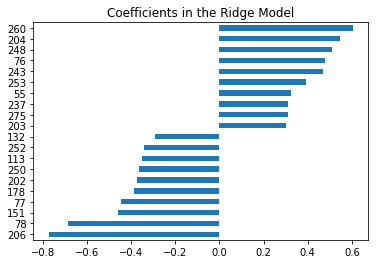

In [9]:
#作业这一步不是必须
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                store_cv_values=True)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

mse_cv = np.mean(ridge.cv_values_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

y_train_rdg = ridge.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_rdg))
print("RMSE on Training set :", rmse_train)


# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")

#正系数值最大的10个特征和负系数值最小（绝对值大）的10个特征
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

('Best alpha :', 0.001)
Try again for more precision with alphas centered around 0.001
('Best alpha :', 0.00090000000000000008)
('cv of rmse :', 0.27962285749911786)
('RMSE on Training set :', 0.27939237026516622)
Lasso picked 119 features and eliminated the other 160 features


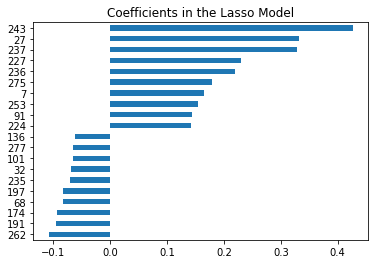

In [8]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
                max_iter = 5000)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

mse_cv = np.mean(lasso.mse_path_, axis = 0)
rmse_cv = np.sqrt(mse_cv)
print("cv of rmse :", min(rmse_cv))

y_train_lasso = lasso.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_lasso))
print("RMSE on Training set :", rmse_train)

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [10]:
y_test_pred = lasso.predict(X_test)
y_test_pred = y_test_pred * std_y +  mean_y

#生成提交测试结果

#df = pd.DataFrame({"Id":test_Id, 'SalePrice':y_test_pred})
#df.reindex(columns=['Id'])
y = pd.Series(data = y_test_pred, name = 'SalePrice')
df = pd.concat([test_Id, y], axis = 1)
df.to_csv('submission.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
Id           1459 non-null int64
SalePrice    1459 non-null float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB
